In [2]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 12.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=272490ca3a755b4e8be142cc744598d89982ed2190cad9bf92fd0d16c1db8ffd
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import pandas_datareader as pdr

In [5]:
#Scraping data
finviz_url="https://finviz.com/quote.ashx?t="
tickers=['TSLA','GOOGL','AMZN']
news_tables={}

In [6]:
for ticker in tickers:
    url=finviz_url+ticker

    req= Request(url=url, headers={'user-agent':'my-app'})
    response=urlopen(req)

    html= BeautifulSoup(response,'html')

    news_table=html.find(id='news-table')
    news_tables[ticker]=news_table

In [7]:
#parsing data
parsed_data=[]
for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title=row.a.get_text()

        time_data=row.td.text.split(' ')
        if len(time_data)==1:
            time=time_data[0]
        else:
            date=time_data[0]
            time=time_data[1]

        parsed_data.append([ticker, date, time,title])

In [9]:
!pip install nltk

In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [12]:
#Sentiment analysis
df=pd.DataFrame(parsed_data, columns=['ticker','date','time','title'])
vader=SentimentIntensityAnalyzer()
df['compound']=df['title'].apply(lambda title: vader.polarity_scores(title)['compound'])

<Figure size 720x576 with 0 Axes>

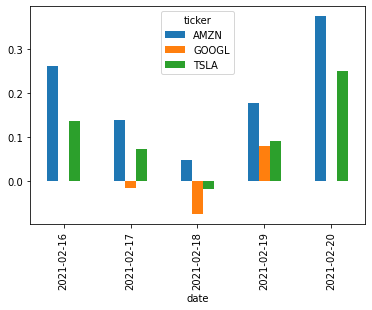

In [13]:
#Visualization
df['date']=pd.to_datetime(df.date).dt.date
plt.figure(figsize=(10,8))
mean_df=df.groupby(['ticker','date']).mean()
mean_df=mean_df.unstack()
mean_df=mean_df.xs('compound',axis='columns').transpose()
mean_df.plot(kind='bar')
plt.show()

In [21]:
end=datetime.datetime.today()
DD = datetime.timedelta(days=7)
start=end - DD
end=end.strftime("%Y-%m-%d")
start=start.strftime("%Y-%m-%d")
tsla_df = yf.download('TSLA',
                      start=start,
                      end=end ,
                      progress=False)
tsla_df.head()



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-16,818.000000,821.000000,792.440002,796.219971,796.219971,19686700
2021-02-17,779.090027,799.840027,762.010010,798.150024,798.150024,25996500
2021-02-18,780.900024,794.690002,776.270020,787.380005,787.380005,17897000
2021-02-19,795.000000,796.789978,777.369995,781.299988,781.299988,18904800


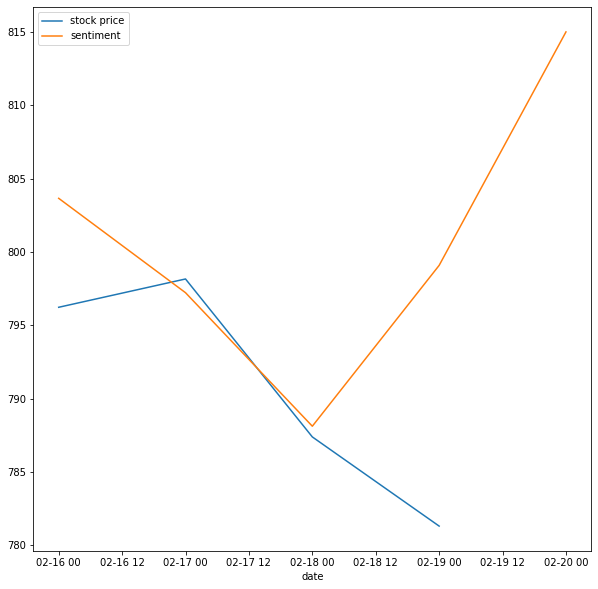

In [26]:
plt.figure(figsize=(10,10))
plt.plot(tsla_df.index, tsla_df['Close'],label='stock price')
plt.plot(mean_df.index, mean_df['TSLA']*100+790,label='sentiment')
plt.xlabel("date")
plt.legend()
plt.show()